In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyne import material
from pyne.material import MaterialLibrary
from pyne import nuc_data
mats = MaterialLibrary(nuc_data, datapath='/material_library/materials', nucpath='/material_library/nucid')

In [84]:
w = mats['Water, Liquid']

In [85]:
w.mcnp()

u'C name: Water, Liquid\nC density = 1.0\nm?\n     1001 -1.1187e-01\n     1002 -2.5713e-05\n     8016 -8.8570e-01\n     8017 -3.5857e-04\n     8018 -2.0482e-03\n'

In [86]:
a = mats["Air (dry, near sea level)"]
a.mcnp()

u'C name: Air (dry, near sea level)\nC density = 0.0\nm?\n     6012 -1.2256e-04\n     6013 -1.4365e-06\n     7014 -7.5232e-01\n     7015 -2.9442e-03\n     8016 -2.3115e-01\n     8017 -9.3580e-05\n     8018 -5.3454e-04\n     18036 -3.8527e-05\n     18038 -7.6673e-06\n     18040 -1.2781e-02\n'

# Energy bins

## 0.6 - 1.5 MeV

In [87]:
import numpy as np

In [88]:
def med_erg(e):
    return 20.2 * np.exp(-1.78 * e)

In [89]:
med_erg(0.6)

6.9426434627486771

In [90]:
med_erg(1.5-0.05)

1.5291050114426159

## 1.5 - 10.5 MeV

In [91]:
def high_erg(e):
    return 7.2 * np.exp(-1.09 * e)

In [92]:
high_erg(1.5)

1.4036570733541136

In [93]:
high_erg(10.5)

7.7060558285406563e-05

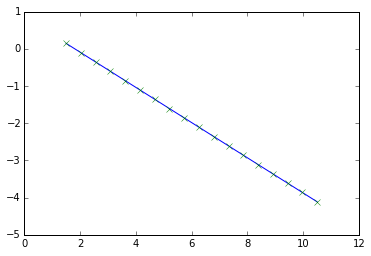

In [94]:
x = np.linspace(1.5, 10.5, 18)
plt.plot(x, np.log10(high_erg(x)))
plt.plot(x, [np.log10(high_erg(xi)) for xi in x], "x")
plt.show()

# How many photons correspond to 1e5 n/s?

In [95]:
n_per_s = 1e5
n_per_fission = 3.76
fission_per_s = n_per_s / n_per_fission
g_per_fission = 8.13
g_per_s = g_per_fission * fission_per_s

In [96]:
g_per_s

216223.40425531918

In [97]:
g_per_shake = g_per_s * 1e-8 # (g / s * s / shake)

In [98]:
g_per_shake

0.0021622340425531917

In [99]:
import pandas as pd

In [110]:
photon_time = pd.read_csv('photon_data.tsv', sep=r'\s*')

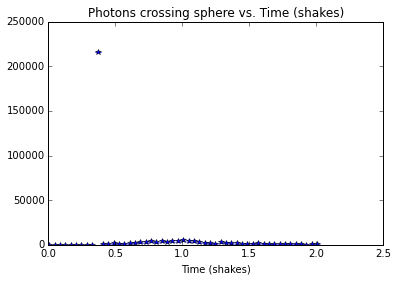

In [101]:
plt.errorbar(photon_time["Time"], photon_time["Tally"], photon_time["Error"] * photon_time["Tally"], fmt="*")
plt.title("Photons crossing sphere vs. Time (shakes)")
plt.xlabel("Time (shakes)")
#plt.ylim([0.,1.05])
plt.show()

# Photon stupid check table 110

In [102]:
import numpy as np

In [103]:
photon_dist = pd.read_csv('photon_table_110.tsv', sep=r'\s*')

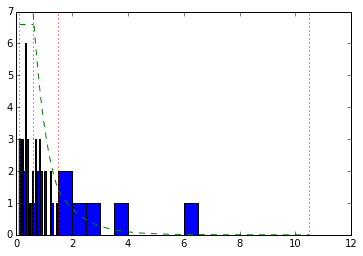

In [143]:
bins = np.arange(0.1, 0.6, 0.05)
bins = np.append(bins, np.arange(0.6, 1.5, 0.05))
bins = np.append(bins, np.arange(1.5, 10.5, 0.5))
plt.hist(photon_dist['energy'], bins=bins)
plt.axvline(0.1, color="r", linestyle='dotted')
plt.axvline(0.6, color="r", linestyle='dotted')
plt.axvline(1.5, color="r", linestyle='dotted')
plt.axvline(10.5, color="r", linestyle='dotted')
x1 = np.linspace(0.1, 0.6, 1000)
x2 = np.linspace(0.6, 1.5, 1000)
x3 = np.linspace(1.5, 10.5, 1000)
plt.plot(x1, [6.6 for x in x1], "g--")
plt.plot(x2, med_erg(x2), "g--")
plt.plot(x3, high_erg(x3), "g--")
plt.show()

In [105]:
-20.2 / 1.78 * (np.exp(-1.78*1.5) - np.exp(-1.78*0.6))

3.1144654558988139

In [106]:
-7.2 / 1.09 * (np.exp(-1.09*10.5) - np.exp(-1.09*1.5))

1.2876880851337871

# Dory Check

In [144]:
dory_photon_dist = pd.read_csv('stuff for JR', sep=r'\s*')

In [145]:
dory_photon_dist

,nps,x,y,z,cell,surf,u,v,w,energy,weight,time
0,1,0,0,0,1,0,0.66230,0.59630,0.453700,0.5261,216200,0
1,2,0,0,0,1,0,-0.27750,-0.10280,0.955200,0.1430,216200,0
2,3,0,0,0,1,0,0.98290,-0.17820,-0.046180,0.5181,216200,0
3,4,0,0,0,1,0,0.87330,-0.48540,-0.040590,0.4002,216200,0
4,6,0,0,0,1,0,0.03717,0.93620,0.349500,0.4257,216200,0
5,5,0,0,0,1,0,0.95250,0.30040,0.050720,0.2648,216200,0
6,7,0,0,0,1,0,-0.58430,0.10640,0.804500,0.4508,216200,0
7,8,0,0,0,1,0,-0.29290,-0.76460,-0.574100,0.4951,216200,0
8,9,0,0,0,1,0,-0.89880,-0.38150,-0.215800,0.5424,216200,0
9,10,0,0,0,1,0,0.23640,0.90270,-0.359500,0.3966,216200,0


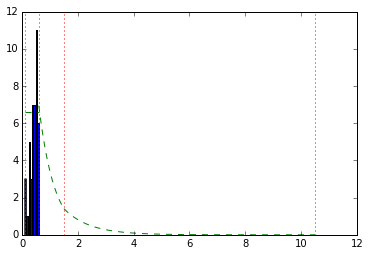

In [146]:
bins = np.arange(0.1, 0.6, 0.05)
bins = np.append(bins, np.arange(0.6, 1.5, 0.05))
bins = np.append(bins, np.arange(1.5, 10.5, 0.5))
plt.hist(dory_photon_dist['energy'], bins=bins)
plt.axvline(0.1, color="r", linestyle='dotted')
plt.axvline(0.6, color="r", linestyle='dotted')
plt.axvline(1.5, color="r", linestyle='dotted')
plt.axvline(10.5, color="r", linestyle='dotted')
x1 = np.linspace(0.1, 0.6, 1000)
x2 = np.linspace(0.6, 1.5, 1000)
x3 = np.linspace(1.5, 10.5, 1000)
plt.plot(x1, [6.6 for x in x1], "g--")
plt.plot(x2, med_erg(x2), "g--")
plt.plot(x3, high_erg(x3), "g--")
plt.show()

# Neutrons

In [137]:
neutron = pd.read_csv('neutron_data.csv')

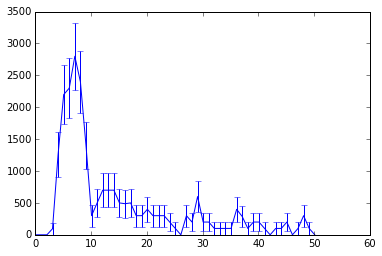

In [141]:
plt.errorbar(neutron['time'], neutron['counts'], neutron['counts']*neutron['error'])
plt.show()

In [166]:
e_check = pd.read_csv('energyproberror.dat', sep=r'\s*')
e_check['prob']

0         0.00000
1     92765.00000
2      9318.58000
3      8566.99000
4      7755.07000
5      7067.05000
6      6467.46000
7      6039.77000
8      5425.48000
9      4997.36000
10     4561.67000
11     4191.49000
12     3807.91000
13     3489.41000
14     3221.51000
15     2923.12000
16     2685.06000
17     2460.19000
18     2239.21000
19     2043.96000
20    15210.50000
21     8770.24000
22     5145.04000
23     2996.21000
24     1683.08000
25      999.60100
26      579.91100
27      342.49800
28      191.79000
29      116.76100
30       65.08320
31       38.70400
32       22.27100
33       13.62210
34       10.37870
35        6.70293
36        3.45957
37        1.29734
Name: prob, dtype: float64

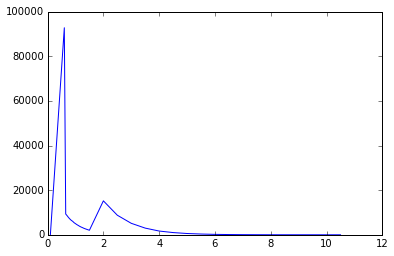

In [165]:
plt.figure()
plt.subplot(111)
plt.plot(e_check['energy'], e_check['prob'])
plt.show()

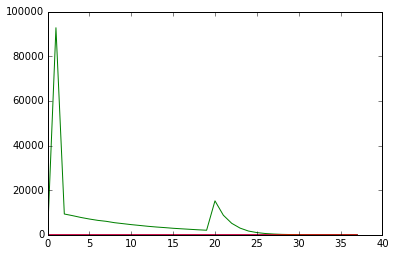

In [167]:
plt.plot(e_check)

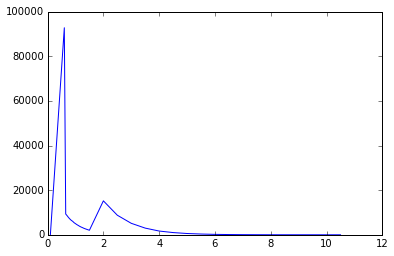

In [171]:
p = np.loadtxt('energyproberror.dat')
plt.plot(p[:,0], p[:,1])
plt.show()

In [169]:
p

array([[  1.00000000e-01,   0.00000000e+00,   0.00000000e+00],
       [  6.00000000e-01,   9.27650000e+04,   1.20000000e-03],
       [  6.50000000e-01,   9.31858000e+03,   4.70000000e-03],
       [  7.00000000e-01,   8.56699000e+03,   4.90000000e-03],
       [  7.50000000e-01,   7.75507000e+03,   5.20000000e-03],
       [  8.00000000e-01,   7.06705000e+03,   5.40000000e-03],
       [  8.50000000e-01,   6.46746000e+03,   5.70000000e-03],
       [  9.00000000e-01,   6.03977000e+03,   5.90000000e-03],
       [  9.50000000e-01,   5.42548000e+03,   6.20000000e-03],
       [  1.00000000e+00,   4.99736000e+03,   6.50000000e-03],
       [  1.05000000e+00,   4.56167000e+03,   6.80000000e-03],
       [  1.10000000e+00,   4.19149000e+03,   7.10000000e-03],
       [  1.15000000e+00,   3.80791000e+03,   7.50000000e-03],
       [  1.20000000e+00,   3.48941000e+03,   7.80000000e-03],
       [  1.25000000e+00,   3.22151000e+03,   8.10000000e-03],
       [  1.30000000e+00,   2.92312000e+03,   8.5000000